In [1]:
import os

if bool(os.environ.get("KAGGLE_URL_BASE", "")):
  import sys
  # running on kaggle
  sys.path.insert(0, "/kaggle/input/hsm-source-files")
else:
  # running locally
  import notebook_setup

import os
import pandas as pd, numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.utils import get_raw_data_dir

2025-10-03 12:02:00,583 :: root :: INFO :: Initialising Utils


In [4]:
BASE_PATH = get_raw_data_dir().resolve().as_posix() + '/'

df = pd.DataFrame({'path': glob(BASE_PATH + '**/*.parquet')})
df['test_type'] = df['path'].str.split('/').str.get(-2).str.split('_').str.get(-1)
df['id'] = df['path'].str.split('/').str.get(-1).str.split('.').str.get(0)

df_eeg = pd.read_parquet(BASE_PATH + 'train_eegs/1628180742.parquet')
df_eeg

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-80.519997,-70.540001,-80.110001,-108.750000,-120.330002,-88.620003,-101.750000,-104.489998,-99.129997,-90.389999,-97.040001,-77.989998,-88.830002,-112.120003,-108.110001,-95.949997,-98.360001,-121.730003,-106.449997,7.920000
1,-80.449997,-70.330002,-81.760002,-107.669998,-120.769997,-90.820000,-104.260002,-99.730003,-99.070000,-92.290001,-96.019997,-84.500000,-84.989998,-115.610001,-103.860001,-97.470001,-89.290001,-115.500000,-102.059998,29.219999
2,-80.209999,-75.870003,-82.050003,-106.010002,-117.500000,-87.489998,-99.589996,-96.820000,-119.680000,-99.360001,-91.110001,-99.440002,-104.589996,-127.529999,-113.349998,-95.870003,-96.019997,-123.879997,-105.790001,45.740002
3,-84.709999,-75.339996,-87.480003,-108.970001,-121.410004,-94.750000,-105.370003,-100.279999,-113.839996,-102.059998,-95.040001,-99.230003,-101.220001,-125.769997,-111.889999,-97.459999,-97.180000,-128.940002,-109.889999,83.870003
4,-90.570000,-80.790001,-93.000000,-113.870003,-129.960007,-102.860001,-118.599998,-101.099998,-107.660004,-102.339996,-98.510002,-95.300003,-88.930000,-115.639999,-99.800003,-97.500000,-88.730003,-114.849998,-100.250000,97.769997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-144.660004,-147.809998,-129.820007,-129.460007,-157.509995,-124.000000,-124.570000,-94.820000,-153.070007,-121.110001,-86.459999,-132.520004,-138.339996,-128.970001,-71.300003,-114.480003,-86.709999,-114.959999,-81.500000,-20.070000
17996,-140.880005,-153.000000,-129.529999,-129.020004,-154.059998,-131.220001,-128.380005,-95.000000,-140.820007,-114.639999,-84.379997,-115.339996,-119.230003,-114.709999,-70.989998,-92.129997,-79.639999,-116.139999,-81.879997,10.600000
17997,-133.729996,-141.770004,-121.900002,-122.370003,-158.750000,-123.550003,-127.730003,-93.089996,-125.230003,-106.489998,-83.419998,-112.720001,-103.209999,-107.629997,-61.869999,-97.910004,-77.150002,-106.500000,-75.339996,-2.060000
17998,-141.449997,-151.139999,-127.190002,-128.699997,-163.460007,-124.309998,-129.479996,-94.419998,-140.869995,-113.339996,-83.519997,-129.300003,-118.650002,-117.589996,-71.879997,-99.279999,-83.900002,-116.160004,-81.410004,2.820000


In [3]:
n_channels = df_eeg.shape[1]
n_channels

20

In [4]:
df = pd.read_csv('../data/train.csv')
TARGETS = df.columns[-6:]
print('Train shape:', df.shape )
print('Targets', list(TARGETS))
df
#df[df["eeg_id"] == 1000913311]
df[df["eeg_id"] == 642382]

Train shape: (106800, 15)
Targets ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
1149,642382,0,0.0,14960202,12,1008.0,3254468733,5955,Other,0,0,0,0,0,1
1150,642382,1,24.0,14960202,13,1032.0,2552357208,5955,Other,0,0,0,0,0,1


In [10]:

SAMPLING_RATE = 200
EEG_WINDOW_SECONDS = 50

def get_eeg_window(train_row, full_eeg_df):
    """
    Extracts a 50-second EEG window centered around the label.
    """
    # The label is for the 10s window starting at the offset
    # The center of that 10s window is offset + 5 seconds
    center_s = train_row['eeg_label_offset_seconds'] + 5
    
    # The 50s EEG window is centered at the same point
    start_s = center_s - (EEG_WINDOW_SECONDS / 2)
    end_s = center_s + (EEG_WINDOW_SECONDS / 2)
    
    # Convert seconds to DataFrame indices
    start_idx = int(start_s * SAMPLING_RATE)
    end_idx = int(end_s * SAMPLING_RATE)
    
    # Ensure indices are within bounds (important for edges of recordings)
    start_idx = max(0, start_idx)
    end_idx = min(len(full_eeg_df), end_idx)

    # Slice the DataFrame
    eeg_window = full_eeg_df.iloc[start_idx:end_idx]
    
    # Note: You might need to handle cases where the slice is not exactly 10,000
    # points (e.g., at the very beginning/end of a recording) by padding.
    
    return eeg_window

# --- Example Usage ---
# Let's simulate with a sample row and a dummy EEG dataframe
sample_row = {'eeg_id': 123, 'eeg_label_offset_seconds': 40}
dummy_eeg_data = np.random.randn(20000, 20) # 100 seconds of data at 200Hz
full_eeg_df = pd.DataFrame(dummy_eeg_data)

eeg_slice = get_eeg_window(sample_row, full_eeg_df)

print(f"Original offset: {sample_row['eeg_label_offset_seconds']}s") # 40s
# Expected start: (40 + 5) - 25 = 20s. Index = 20 * 200 = 4000
# Expected end: (40 + 5) + 25 = 70s. Index = 70 * 200 = 14000
print(f"Extracted slice shape: {eeg_slice.shape}") # Should be (10000, 20)

Original offset: 40s
Extracted slice shape: (10000, 20)


/tmp/ipykernel_70713/2237128337.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], data=df, y='target', order=df['target'].value_counts().index, palette='viridis')


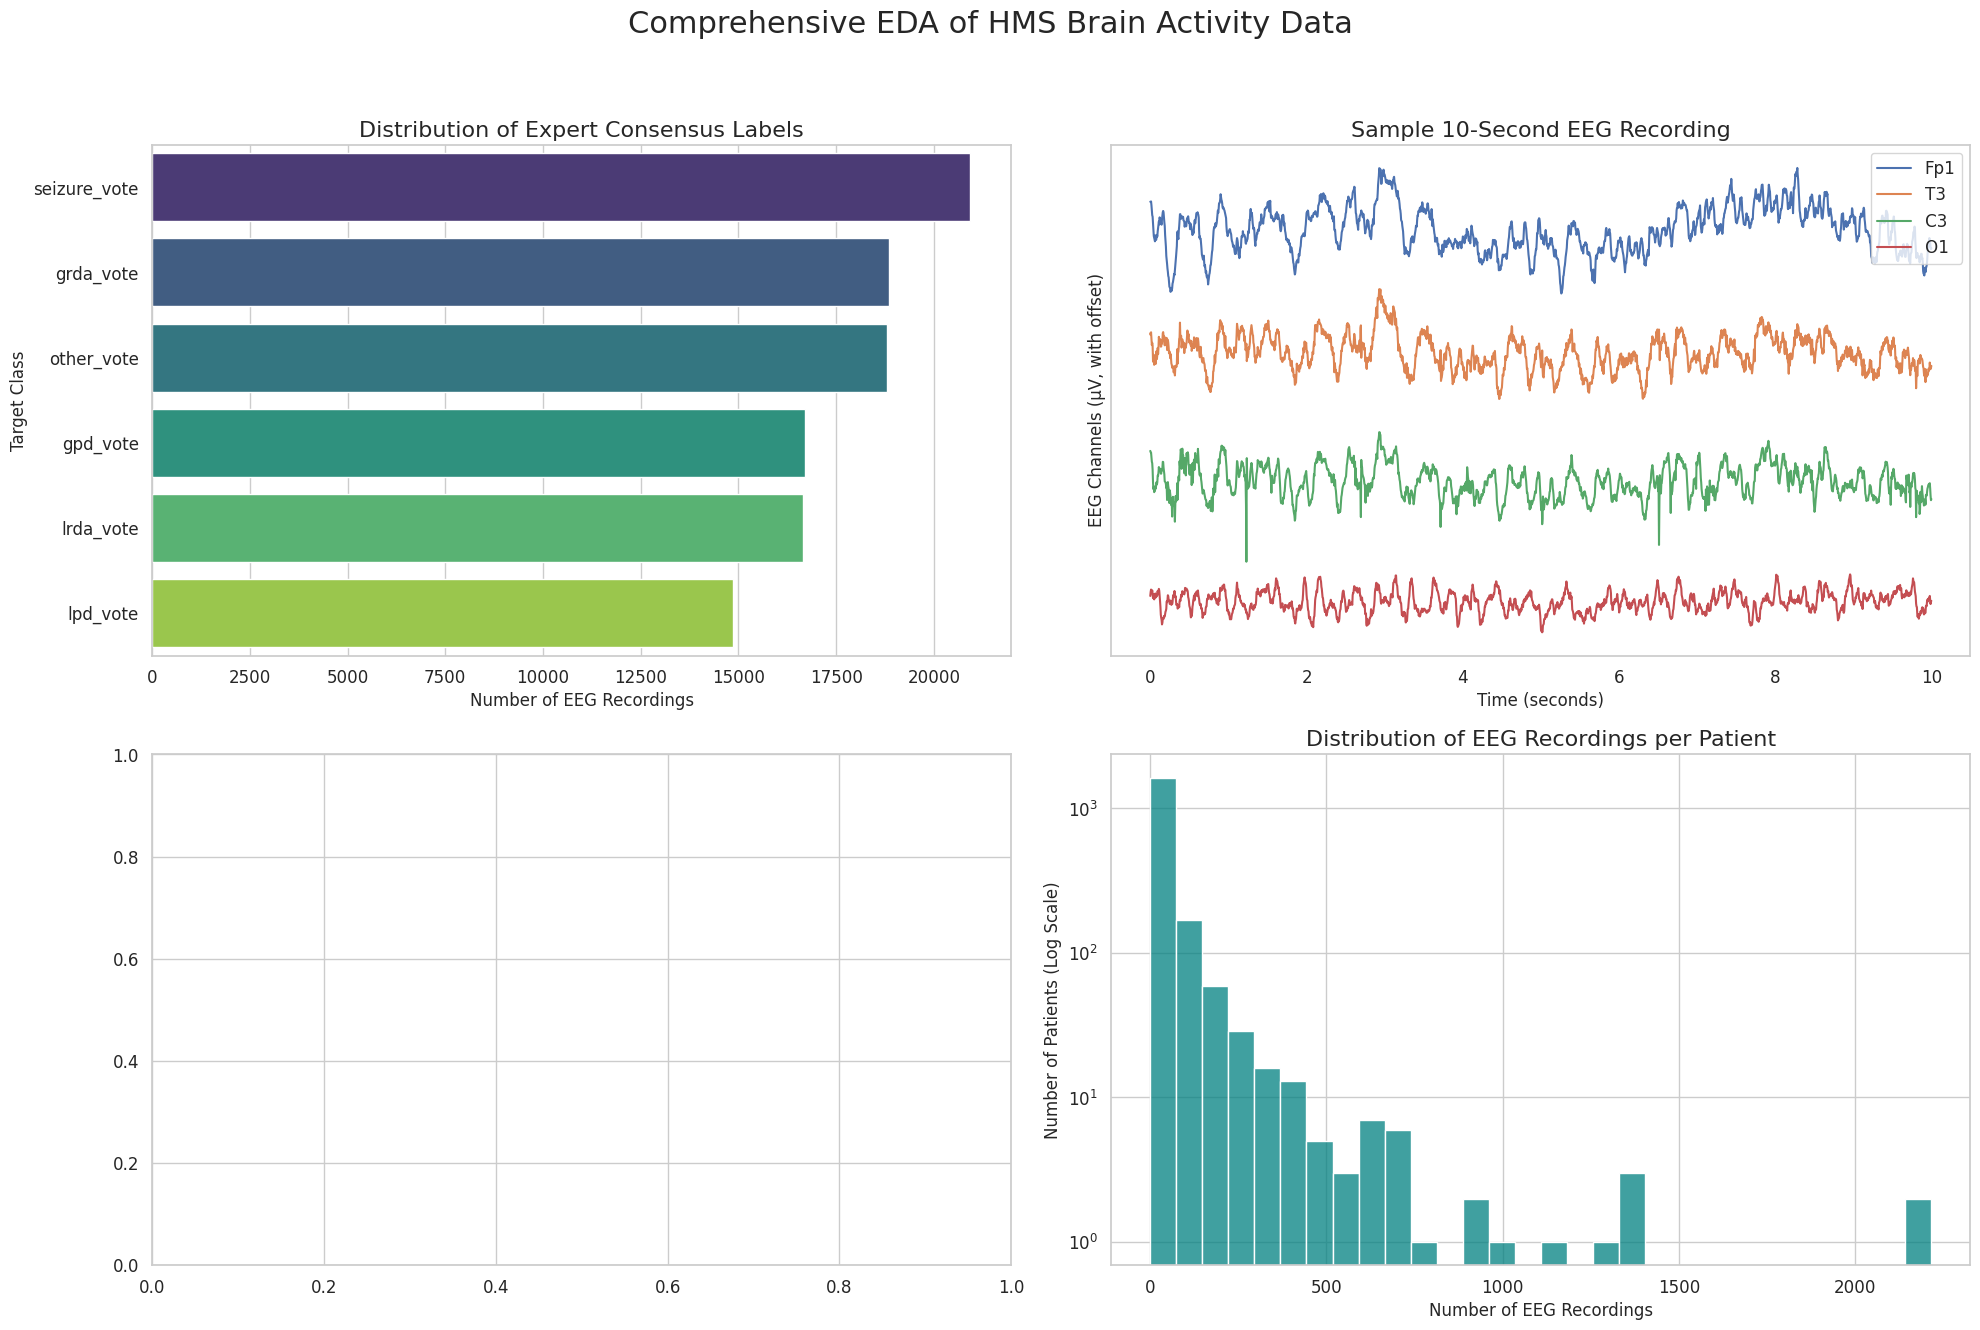

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df['target'] = df[TARGETS].idxmax(axis=1)

sns.set(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Comprehensive EDA of HMS Brain Activity Data', fontsize=22)

sns.countplot(ax=axes[0, 0], data=df, y='target', order=df['target'].value_counts().index, palette='viridis')
axes[0, 0].set_title('Distribution of Expert Consensus Labels', fontsize=16)
axes[0, 0].set_xlabel('Number of EEG Recordings', fontsize=12)
axes[0, 0].set_ylabel('Target Class', fontsize=12)

SAMPLE_RATE = 200
SECONDS_TO_PLOT = 10
channels_to_plot = ['Fp1', 'T3', 'C3', 'O1']
eeg_sample = df_eeg.head(SECONDS_TO_PLOT * SAMPLE_RATE)
offset = 0
for channel in channels_to_plot:
    axes[0, 1].plot(np.arange(len(eeg_sample)) / SAMPLE_RATE, eeg_sample[channel] - offset, label=channel)
    offset += 150
axes[0, 1].set_title('Sample 10-Second EEG Recording', fontsize=16)
axes[0, 1].set_xlabel('Time (seconds)', fontsize=12)
axes[0, 1].set_ylabel('EEG Channels (µV, with offset)', fontsize=12)
axes[0, 1].set_yticks([])
axes[0, 1].legend(loc='upper right')
axes[0, 1].grid(False)


patient_eeg_counts = df['patient_id'].value_counts()
sns.histplot(ax=axes[1, 1], x=patient_eeg_counts, bins=30, kde=False, color='teal')
axes[1, 1].set_title('Distribution of EEG Recordings per Patient', fontsize=16)
axes[1, 1].set_xlabel('Number of EEG Recordings', fontsize=12)
axes[1, 1].set_ylabel('Number of Patients (Log Scale)', fontsize=12)
axes[1, 1].set_yscale('log')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()